In [ ]:
# Build model using transfer learning MobileNet

In [2]:
# Requirement Lib Import
import os
import random
import tensorflow as tf
from tensorflow import keras

In [3]:
# Check GPU support and Get GPU device
from tensorflow.python.client import device_lib 

try:
    print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))
    print(device_lib.list_local_devices())
except:
      print('No GPU devices found!')

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16008978275907242468
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3134364059
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3693207654107511087
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
# Set default desired model input shape size
INPUT_SIZE = (96, 96)

In [5]:
# List path locations
BASE_PATH = './dataset'
BASE_DATASET_PATH = os.path.join(BASE_PATH, 'hand-sign-bisindo', 'anoted')
BASE_DATASET_EXT_PATH = os.path.join(BASE_PATH, 'hand-sign-bisindo', 'extracted')

TRAIN_DATASET_PATH = os.path.join(BASE_DATASET_EXT_PATH, 'train')
VALIDATION_DATASET_PATH = os.path.join(BASE_DATASET_EXT_PATH, 'val')
TEST_DATASET_PATH = os.path.join(BASE_DATASET_EXT_PATH, 'test')

In [6]:
static_labels = os.listdir(TRAIN_DATASET_PATH)
IMG_MIN = 999999

for label in static_labels:
    img_num = len(os.listdir(os.path.join(TRAIN_DATASET_PATH, label)))
    if img_num < IMG_MIN:
        IMG_MIN = img_num
    print('Total TRAINING \'{}\' Images:'.format(label), img_num)

# print('Min size is {}'.format(IMG_MIN))

Total TRAINING 'A' Images: 317
Total TRAINING 'B' Images: 215
Total TRAINING 'C' Images: 196
Total TRAINING 'D' Images: 280
Total TRAINING 'E' Images: 223
Total TRAINING 'F' Images: 220
Total TRAINING 'G' Images: 206
Total TRAINING 'H' Images: 245
Total TRAINING 'I' Images: 248
Total TRAINING 'J' Images: 172
Total TRAINING 'K' Images: 243
Total TRAINING 'L' Images: 204
Total TRAINING 'M' Images: 239
Total TRAINING 'N' Images: 247
Total TRAINING 'O' Images: 352
Total TRAINING 'P' Images: 257
Total TRAINING 'Q' Images: 201
Total TRAINING 'R' Images: 219
Total TRAINING 'S' Images: 255
Total TRAINING 'T' Images: 228
Total TRAINING 'U' Images: 332
Total TRAINING 'V' Images: 264
Total TRAINING 'W' Images: 208
Total TRAINING 'X' Images: 277
Total TRAINING 'Y' Images: 229
Total TRAINING 'Z' Images: 174


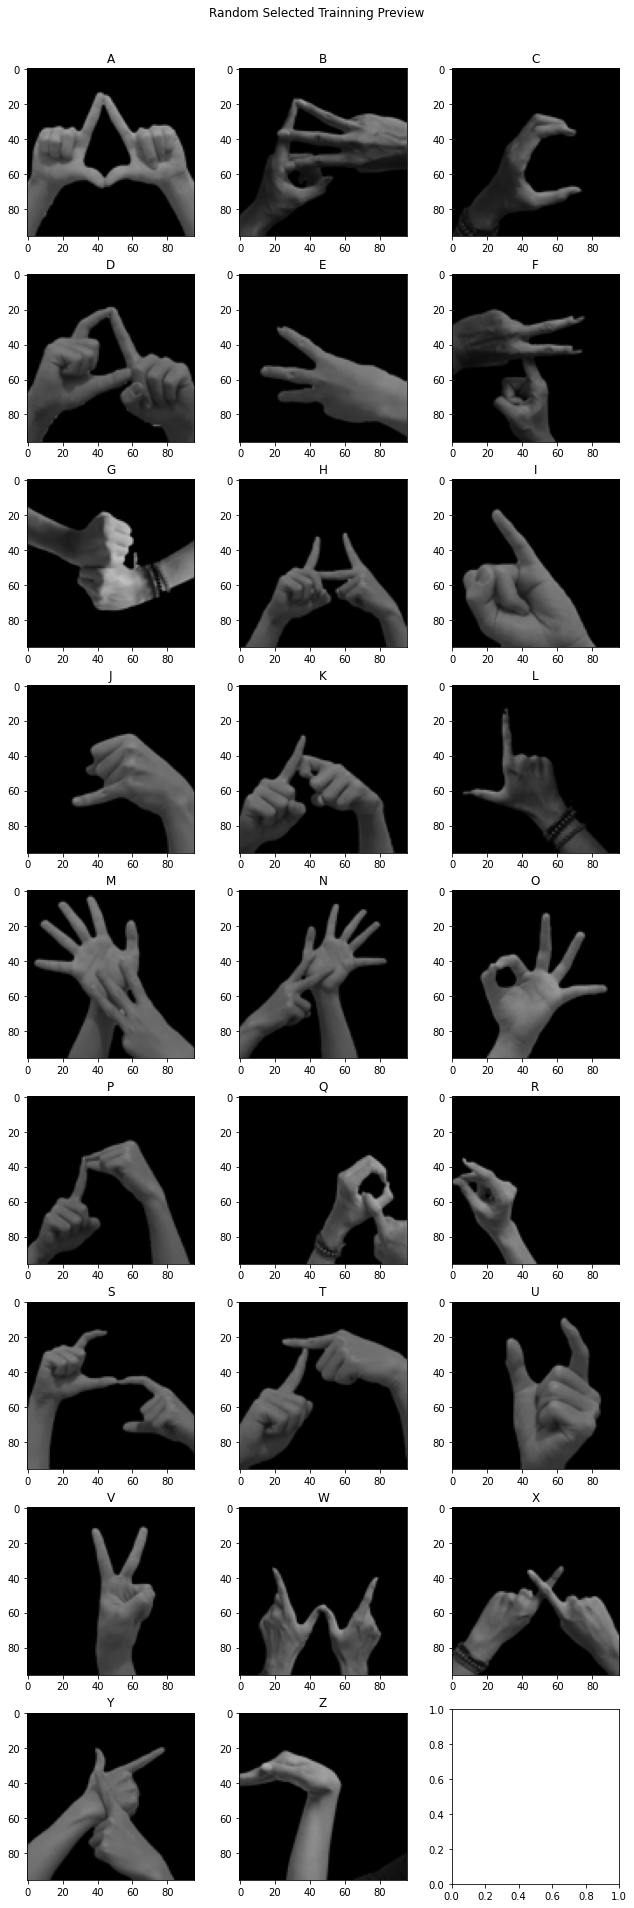

In [7]:
# Requirement Lib Import
import math
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Random seed
seed = random.randint(0, IMG_MIN)

# plot matrix size
cols = 3
rows = math.ceil(len(static_labels) / 3)

# Show image plot
fig_size = 3
fig, axs = plt.subplots(rows, cols, figsize = ((fig_size * cols), (fig_size * rows)))
fig.suptitle('Random Selected Trainning Preview')
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
axs = axs.ravel()

# Image training random selector
img_dict = {}
for idx, label in enumerate(static_labels):
    img_path = os.path.join(TRAIN_DATASET_PATH, label)
    img_rand = os.listdir(img_path)[seed]
    img_selc = image.load_img(os.path.join(img_path, img_rand))

    axs[idx].imshow(img_selc.resize(INPUT_SIZE))
    axs[idx].set_title(label)

In [8]:
# Dataset pre-processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1 / 255,
    # rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1 / 255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size = INPUT_SIZE,
    class_mode = 'categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATASET_PATH,
    target_size = INPUT_SIZE,
    class_mode = 'categorical'
)

Found 6251 images belonging to 26 classes.
Found 769 images belonging to 26 classes.


In [9]:
# defined classes based on foldering structure, sort by alphabetical
LABELS = list(train_generator.class_indices.keys())
NUM_CLASSES = len(LABELS) # Set classes num
print(NUM_CLASSES)

26


In [10]:
# from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV2

pre_trained_model = MobileNetV2(
    weights = 'imagenet', 
    input_shape = (INPUT_SIZE[0], INPUT_SIZE[1], 3), 
    include_top = False, 
)

pre_trained_model.trainable = False

In [32]:
# Fine Tuning
pre_trained_model.trainable = True

for layer in pre_trained_model.layers[:100]:
    layer.trainable = False

In [33]:
# from tensorflow.keras import layers
# from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
# More info about Adam optimzer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

# Flatten the output layer to 1 dimension
# x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(512, activation = 'relu')(x)
# Add a dropout rate of 0.1
# x = layers.Dropout(0.1)(x)                  
# Add a final sigmoid layer for classification
# x = layers.Dense(NUM_CLASSES, activation = 'softmax')(x)  

# Re-Create model
# model = Model(inputs = pre_trained_model.input, outputs = x)

# model = tf.keras.Sequential([
#     pre_trained_model,
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(512, activation = 'relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
# ])

# Compile Model
model.compile(
    optimizer = Adam(learning_rate = 0.00001), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

# Start Training!
history = model.fit(
    train_generator, 
    validation_data = validation_generator, 
    steps_per_epoch = 50,
    initial_epoch = 30,
    epochs = 60, 
    validation_steps = 10,
    verbose = 1
)

Epoch 31/60
50/50 [==============================] - 12s 179ms/step - loss: 1.6997 - accuracy: 0.5632 - val_loss: 0.0624 - val_accuracy: 0.9812
Epoch 32/60
50/50 [==============================] - 9s 173ms/step - loss: 0.9029 - accuracy: 0.7305 - val_loss: 0.0932 - val_accuracy: 0.9719
Epoch 33/60
50/50 [==============================] - 9s 178ms/step - loss: 0.7032 - accuracy: 0.8015 - val_loss: 0.0837 - val_accuracy: 0.9750
Epoch 34/60
50/50 [==============================] - 9s 182ms/step - loss: 0.4946 - accuracy: 0.8556 - val_loss: 0.1023 - val_accuracy: 0.9625
Epoch 35/60
50/50 [==============================] - 9s 182ms/step - loss: 0.4658 - accuracy: 0.8613 - val_loss: 0.0877 - val_accuracy: 0.9719
Epoch 36/60
50/50 [==============================] - 9s 187ms/step - loss: 0.3839 - accuracy: 0.8807 - val_loss: 0.0967 - val_accuracy: 0.9719
Epoch 37/60
50/50 [==============================] - 8s 166ms/step - loss: 0.3289 - accuracy: 0.8935 - val_loss: 0.0722 - val_accuracy: 0.981

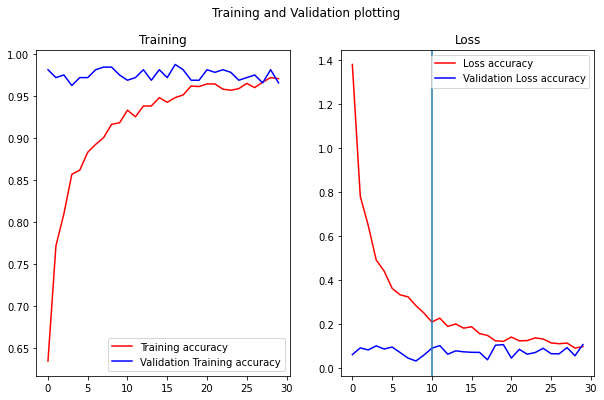

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize = (10, 6))
fig.suptitle('Training and Validation plotting')
axs[0].plot(epochs, acc, 'r', label = 'Training accuracy')
axs[0].plot(epochs, val_acc, 'b', label = 'Validation Training accuracy')
axs[0].set_title('Training')
axs[0].legend()
axs[1].plot(epochs, loss, 'r', label = 'Loss accuracy')
axs[1].plot(epochs, val_loss, 'b', label = 'Validation Loss accuracy')
axs[1].set_title('Loss')
axs[1].legend()
# plt.axvline(x = 10)
plt.show()

In [14]:
def selectRandomImage(labels = None):
    if labels == None:
        seed = random.randint(1, NUM_CLASSES)
        label_seed = LABELS[seed - 1]
    else:
        seed = random.randint(1, len(labels))
        label_seed = labels[seed - 1]
    
    path = os.path.join(TEST_DATASET_PATH, label_seed)
    test_dir = os.listdir(path)
    test_dir_num = len(test_dir)
    file_name = os.listdir(path)[random.randint(0, test_dir_num - 1)]
    return (os.path.join(path, file_name), file_name, label_seed)

In [15]:
def createResultPlot(prediction_list, prediction_label, actual_label, file_name):
    # Result Plot
    fig, axs = plt.subplots(1, 2, figsize = (10, 5))
    fig.suptitle('Image {} predict as: {}'.format(file_name, prediction_label))
    fig.subplots_adjust(top = 0.95)
    fig.tight_layout()
    axs = axs.ravel()

    # See other color refrences: https://xkcd.com/color/rgb/
    if prediction_label == actual_label:
        #If prediction True
        fig.patch.set_facecolor('xkcd:mint green')
    else:
        #If prediction False
        fig.patch.set_facecolor('xkcd:pale pink')

    # Show selected image
    axs[0].set_title(actual_label)
    axs[0].imshow(img)

    # Prediction Probabilities Plot
    axs[1].set_title('Probabilities')
    axs[1].bar(range(0, NUM_CLASSES), prediction_list, align = 'center')
    axs[1].set_xticks(range(0, NUM_CLASSES))
    axs[1].set_xticklabels(LABELS)

    plt.show()

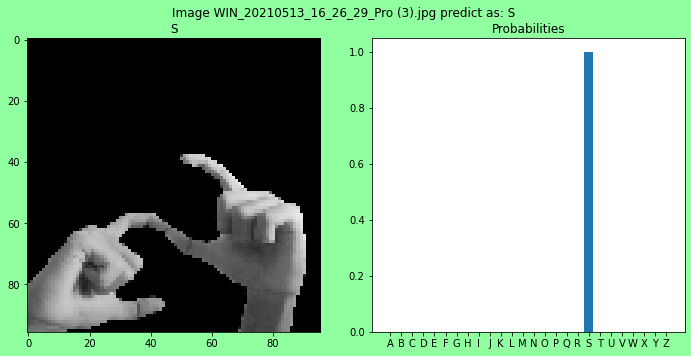

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# predicting images
file_path, file_name, label = selectRandomImage()
# file_path, file_name, label = selectRandomImage(['S'])
img = image.load_img(file_path, target_size = INPUT_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

prediction = model.predict(x, batch_size = 10) # Predict Image
index = int(prediction[0].argmax(axis = -1)) # Get max classes index

# Result Plot
createResultPlot(prediction[0].reshape(NUM_CLASSES), LABELS[index], label, file_name)

In [29]:
static_labels = os.listdir(TRAIN_DATASET_PATH)
IMG_TEST_MIN = 999999

for label in LABELS:
    img_num = len(os.listdir(os.path.join(TEST_DATASET_PATH, label)))
    if img_num < IMG_TEST_MIN:
        IMG_TEST_MIN = img_num
    print('Total TESTING \'{}\' Images:'.format(label), img_num)

# print('Min size is {}'.format(IMG_MIN))

Total TESTING 'A' Images: 41
Total TESTING 'B' Images: 28
Total TESTING 'C' Images: 25
Total TESTING 'D' Images: 35
Total TESTING 'E' Images: 29
Total TESTING 'F' Images: 29
Total TESTING 'G' Images: 27
Total TESTING 'H' Images: 32
Total TESTING 'I' Images: 31
Total TESTING 'J' Images: 22
Total TESTING 'K' Images: 31
Total TESTING 'L' Images: 26
Total TESTING 'M' Images: 31
Total TESTING 'N' Images: 32
Total TESTING 'O' Images: 44
Total TESTING 'P' Images: 33
Total TESTING 'Q' Images: 26
Total TESTING 'R' Images: 28
Total TESTING 'S' Images: 33
Total TESTING 'T' Images: 30
Total TESTING 'U' Images: 43
Total TESTING 'V' Images: 34
Total TESTING 'W' Images: 26
Total TESTING 'X' Images: 36
Total TESTING 'Y' Images: 30
Total TESTING 'Z' Images: 23


In [38]:
# Create confussion matrix to all label in test dir
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix

# Variable storing pred
y_true = [] # Actual 
y_pred = [] # Pediction

for label in LABELS:
    # Get iamges
    path = os.path.join(TEST_DATASET_PATH, label)
    files = os.listdir(path)
    for idx, file_name in enumerate(files):
        if idx < IMG_TEST_MIN:
            file_loc = os.path.join(path, file_name)
            img = image.load_img(file_loc, target_size = INPUT_SIZE)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis = 0)
            x = preprocess_input(x)

            prediction = model.predict(x) # Predict Image
            index = int(prediction[0].argmax(axis = -1)) # Get max classes index
            y_true.append(label)
            y_pred.append(LABELS[index])
        else:
            break

mat = confusion_matrix(y_true, y_pred, labels = LABELS)

Total testing: 22


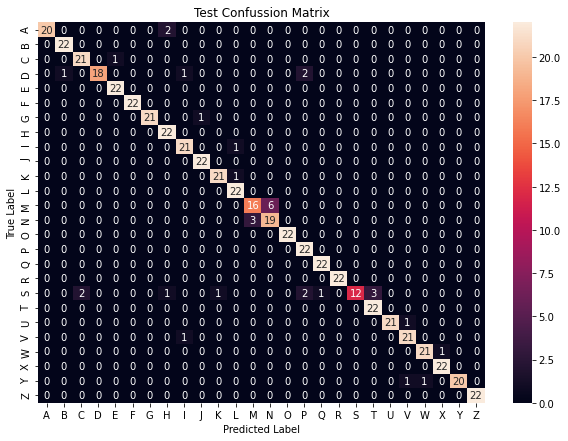

In [39]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

print('Total testing: {}'.format(IMG_TEST_MIN))
df_cm = pd.DataFrame(mat, index = LABELS, columns = LABELS)

plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot = True)
ax.set_title("Test Confussion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

plt.show()

In [ ]:
# Save model
model.save(os.path.join(os.getcwd(), 'models','hand-sign-bisindo-model-mobilenet(96x96).h5'))